<a href="https://colab.research.google.com/github/komal-shahzada/Syntecxhub-Internship-tasks/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link failed, creating sample data...


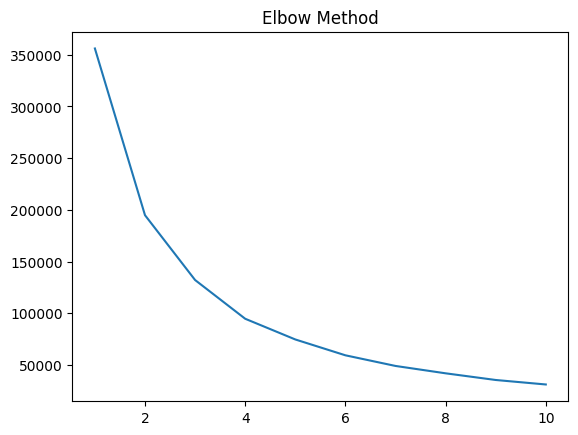

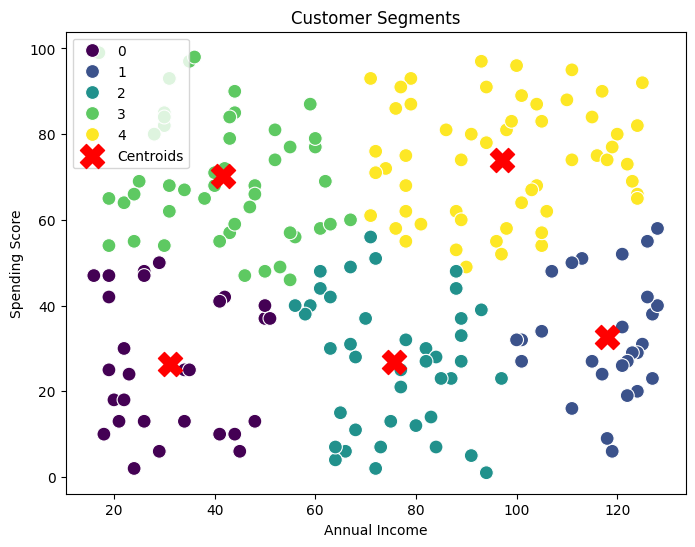

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 1. Dataset Loading with Error Handling
try:
    url = "https://raw.githubusercontent.com/stephiereed/K-means-clustering-on-Mall-Customers-Dataset/master/Mall_Customers.csv"
    df = pd.read_csv(url)
    print("Dataset loaded from GitHub!")
except:
    # Agar internet/link ka masla ho to fake data banayein
    print("Link failed, creating sample data...")
    data = {
        'Annual Income (k$)': np.random.randint(15, 130, 200),
        'Spending Score (1-100)': np.random.randint(1, 100, 200)
    }
    df = pd.DataFrame(data)

# 2. Features selection
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# 3. Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.show()

# 4. Final Model & Visualization
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_kmeans, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [4]:
import gradio as gr
import numpy as np

# Prediction function for Gradio
def predict_segment(income, spending_score):
    # Mapping the cluster numbers to human-readable labels
    labels = {
        0: "Careful (High Income, Low Spend)",
        1: "Standard (Average Income & Spend)",
        2: "Target Group (High Income, High Spend) - ⭐ High Value",
        3: "Spendthrift (Low Income, High Spend)",
        4: "Sensible (Low Income, Low Spend)"
    }

    # Reshape input and predict using the trained 'kmeans' model from previous code
    input_data = np.array([[income, spending_score]])
    cluster = kmeans.predict(input_data)[0]
    return labels[cluster]

# UI Design
with gr.Blocks(theme=gr.themes.Soft()) as demo1:
    gr.Markdown("# 🛍️ Customer Segmentation Tool")
    gr.Markdown("Enter customer details to identify their shopping segment.")

    with gr.Row():
        income_input = gr.Number(label="Annual Income (k$)")
        score_input = gr.Slider(minimum=1, maximum=100, label="Spending Score (1-100)")

    submit_btn = gr.Button("Analyze Customer", variant="primary")
    output_text = gr.Textbox(label="Identified Segment")

    submit_btn.click(fn=predict_segment, inputs=[income_input, score_input], outputs=output_text)

demo1.launch(share=True)

/tmp/ipython-input-3765913506.py:21: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo1:


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6a4fae75753c295f2e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
